In [7]:
from lll import *
import matplotlib.pyplot as plt
basis = generate_lattice_points(3, 2**32)
	
#instantiating the class
reduction = LLL(3, basis)

print("Basis:\n", basis)
print("Hadamard Ratio: ", Lattice.had_ratio(basis))

red_bas= reduction.lll()
print("Reduced Basis:\n", red_bas)
print("Hadamard Ratio: ", Lattice.had_ratio(red_bas))

plot_lattice_3D(basis[0], basis[1], basis[2], red_bas[0], red_bas[1], red_bas[2], points_count=3)

Basis:
 [[-2663067070 -3320819544  3223219389]
 [  366247251 -2491054966  -565488074]
 [-1657728892 -2802437336  3280105686]]
Hadamard Ratio:  0.5437493228622381
Reduced Basis:
 [[ 1005338178   518382208    56886297]
 [ 1371585429 -1972672758  -508601777]
 [  352947464 -1765672920  3393878280]]
Hadamard Ratio:  0.9858203531879796


In [8]:
i_had = []
for i in range(3, 50): #i is the dimension
	had_list = []
	had_list_bad = []
	for j in range(100):
		basis = generate_lattice_points(i, 2**32)
		had_list_bad.append(Lattice.had_ratio(basis))
		reduced_bas = LLL(i, basis).lll()
		had_list.append(Lattice.had_ratio(reduced_bas))
	i_had.append([i, sum(had_list)/len(had_list), sum(had_list_bad)/len(had_list_bad)])
    
    

/Users/jenish/Library/CloudStorage/Dropbox/crypto/Lattice/lattice_code/src/lattice.py:79: RuntimeWarning: overflow encountered in scalar multiply
  vol *= np.linalg.norm(i)
/Users/jenish/Library/CloudStorage/Dropbox/crypto/Lattice/lattice_code/src/lattice.py:67: RuntimeWarning: overflow encountered in scalar multiply
  self.vol *= np.linalg.norm(i)
/Users/jenish/Library/Python/3.9/lib/python/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/jenish/Library/CloudStorage/Dropbox/crypto/Lattice/lattice_code/src/lattice.py:80: RuntimeWarning: invalid value encountered in scalar divide
  return abs(det/vol) ** (1/dim)
/Users/jenish/Library/CloudStorage/Dropbox/crypto/Lattice/lattice_code/src/lattice.py:68: RuntimeWarning: invalid value encountered in scalar divide
  return abs(self.det/self.vol) ** (1/self.dim)


In [9]:
i_had = np.array(i_had)

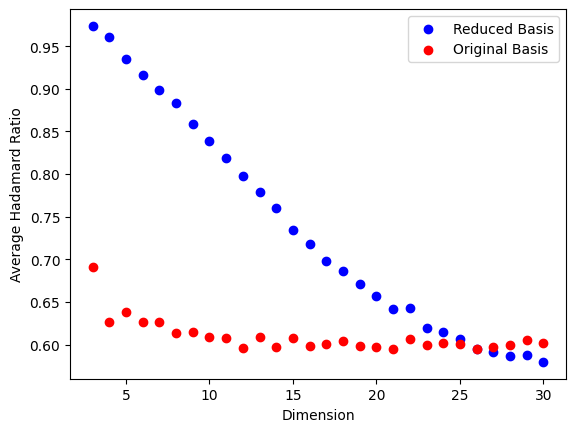

In [13]:
plt.scatter(x= i_had[:,0], y = i_had[:, 1], c='b', )
plt.scatter(x = i_had[:,0], y = i_had[:,2], c = 'r')
plt.legend(["Reduced Basis", "Original Basis"], loc ="upper right")
plt.xlabel("Dimension")
plt.ylabel("Average Hadamard Ratio")
plt.show()

In [11]:
import numpy as np

def generate_lattice_points(dimension, q):
	'''
	q: parameter for finite field Z_q
	dimension: lattice dimension
	generates a (dimension * dimension) matrix with random entries from Z_q. The basis can be any
	'''
	det = 0
	while det == 0:
		M = np.random.randint(-q, q, size=(dimension, dimension))
		det = np.linalg.det(M)
	return M

def had_ratio(basis:np.ndarray):
	'''
	Computes the hadamard_ratio
	'''
	det = np.linalg.det(basis)
	dim = basis.shape[0]
	vol = 1
	for i in basis:
		vol *= np.linalg.norm(i)
	return abs(det/vol) ** (1/dim)

In [21]:
i_had = []
for i in range(3, 50): #i is the dimension
	had_list = []
	had_list_bad = []
	for j in range(100):
		basis = generate_lattice_points(i, 2**32)
		had_list_bad.append(had_ratio(basis))
		basis = Matrix(basis)
		reduced_bas = basis.LLL()
		had_list.append(had_ratio(reduced_bas.numpy()))
	i_had.append([i, sum(had_list)/len(had_list), sum(had_list_bad)/len(had_list_bad)])

In [22]:
i_had = np.array(i_had)

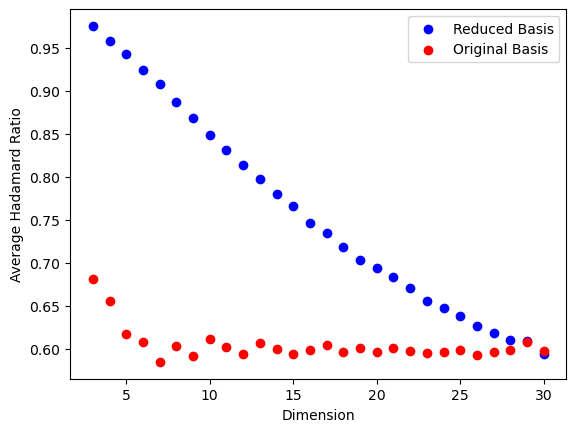

In [23]:
import matplotlib.pyplot as plt
plt.scatter(x= i_had[:,0], y = i_had[:, 1], c='b', )
plt.scatter(x = i_had[:,0], y = i_had[:,2], c = 'r')
plt.legend(["Reduced Basis", "Original Basis"], loc ="upper right")
plt.xlabel("Dimension")
plt.ylabel("Average Hadamard Ratio")
plt.show()